# Анали3 основных индикаторов

In [114]:
import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime

import talib as ta 


import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('bmh')

import yfinance as yf 

import warnings
warnings.filterwarnings('ignore')

In [115]:
# Укаываем дату
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day, end.hour)

In [116]:
# Тикер компании, срау перевод в ДФ
Ticker_df = pd.DataFrame(yf.download('SMCI', start, end))

[*********************100%***********************]  1 of 1 completed


In [119]:
                                                # Indicators
"""Bolinger Bands
Индикатор отмеряем 2 стандартных отклонения и рисует их на графике."""

upper, mid, lower = ta.BBANDS(Ticker_df.Close, timeperiod=50, nbdevup=2, nbdevdn=2)

""" chaikin
High values indicate that intraday prices have a wide high-to-low range. 
Low values indicate that intraday prices have relatively constant high-to-low range.
Market tops that are accompanied by increased volatility over short periods of time indicate nervous and indecisive traders. 
Market tops with decreasing volatility over long timeframes indicate maturing bull markets."""

chaikin = ta.ADOSC(Ticker_df.High, Ticker_df.Low, Ticker_df.Close, Ticker_df.Volume)

"""Relative Strength Index - RSI

How this indicator works
RSI is considered overbought when above 70 and oversold when below 30. These traditional levels can also be adjusted 
if necessary to better fit the security. For example, if a security is repeatedly reaching the overbought level of 70 you may 
want to adjust this level to 80.
Note: During strong trends, the RSI may remain in overbought or oversold for extended periods.

RSI also often forms chart patterns that may not show on the underlying price chart, such as double tops and bottoms 
and trend lines. Also, look for support or resistance on the RSI.
In an uptrend or bull market, the RSI tends to remain in the 40 to 90 range with the 40-50 zone acting as support. 
During a downtrend or bear market the RSI tends to stay between the 10 to 60 range with the 50-60 zone acting as resistance. 
These ranges will vary depending on the RSI settings and the strength of the security’s or market’s underlying trend.
If underlying prices make a new high or low that isn't confirmed by the RSI, this divergence can signal a price reversal. 
If the RSI makes a lower high and then follows with a downside move below a previous low, a Top Swing Failure has occurred. 
If the RSI makes a higher low and then follows with an upside move above a previous high, 
a Bottom Swing Failure has occurred."""

rsi = ta.RSI(Ticker_df.Close, timeperiod = 15)

""" Money Flow Index MFI
How this indicator works Oversold levels typically occur below 20 and overbought levels typically occur above 80. 
These levels may change depending on market conditions. 
Level lines should cut across the highest peaks and the lowest troughs."""

MFI = ta.MFI(Ticker_df.High, Ticker_df.Low, Ticker_df.Close, Ticker_df.Volume, timeperiod = 15)

""" Aroon Indicator
-The Aroon indicator, developed by Tushar Chande, indicates if a price is trending or is in a trading range. 
It can al so reveal the beginning of a new trend, its strength and can help anticipate changes from trading ranges to trends.
-When Aroon-Down reaches 100, a new downtrend may have begun. If it remains persistently between 70 and 100, 
and the Aroon-Up remains between 0 and 30, then a new downtrend is underway. When Aroon-Up 
and Aroon-Down move in parallel (horizontal, sloping up or down) with each other at roughly the same level, 
then price is range trading or consolidating."""

aroondown, aroonup = ta.AROON(Ticker_df.High, Ticker_df.Low, timeperiod=20)

""" Rate of Change (ROC)
How this indicator works An upward surge in the Rate-of-Change reflects a sharp price advance. 
A downward plunge indicates a steep price decline. In general, prices are rising as long as the Rate-of-Change remains positive. 
Conversely, prices are falling when the Rate-of-Change is negative. 
ROC expands into positive territory as an advance accelerates. 
ROC moves deeper into negative territory as a decline accelerates."""

ROC = ta.ROC(Ticker_df.Close, timeperiod=20)




Text(0.5, 1.0, 'Rate of Change')

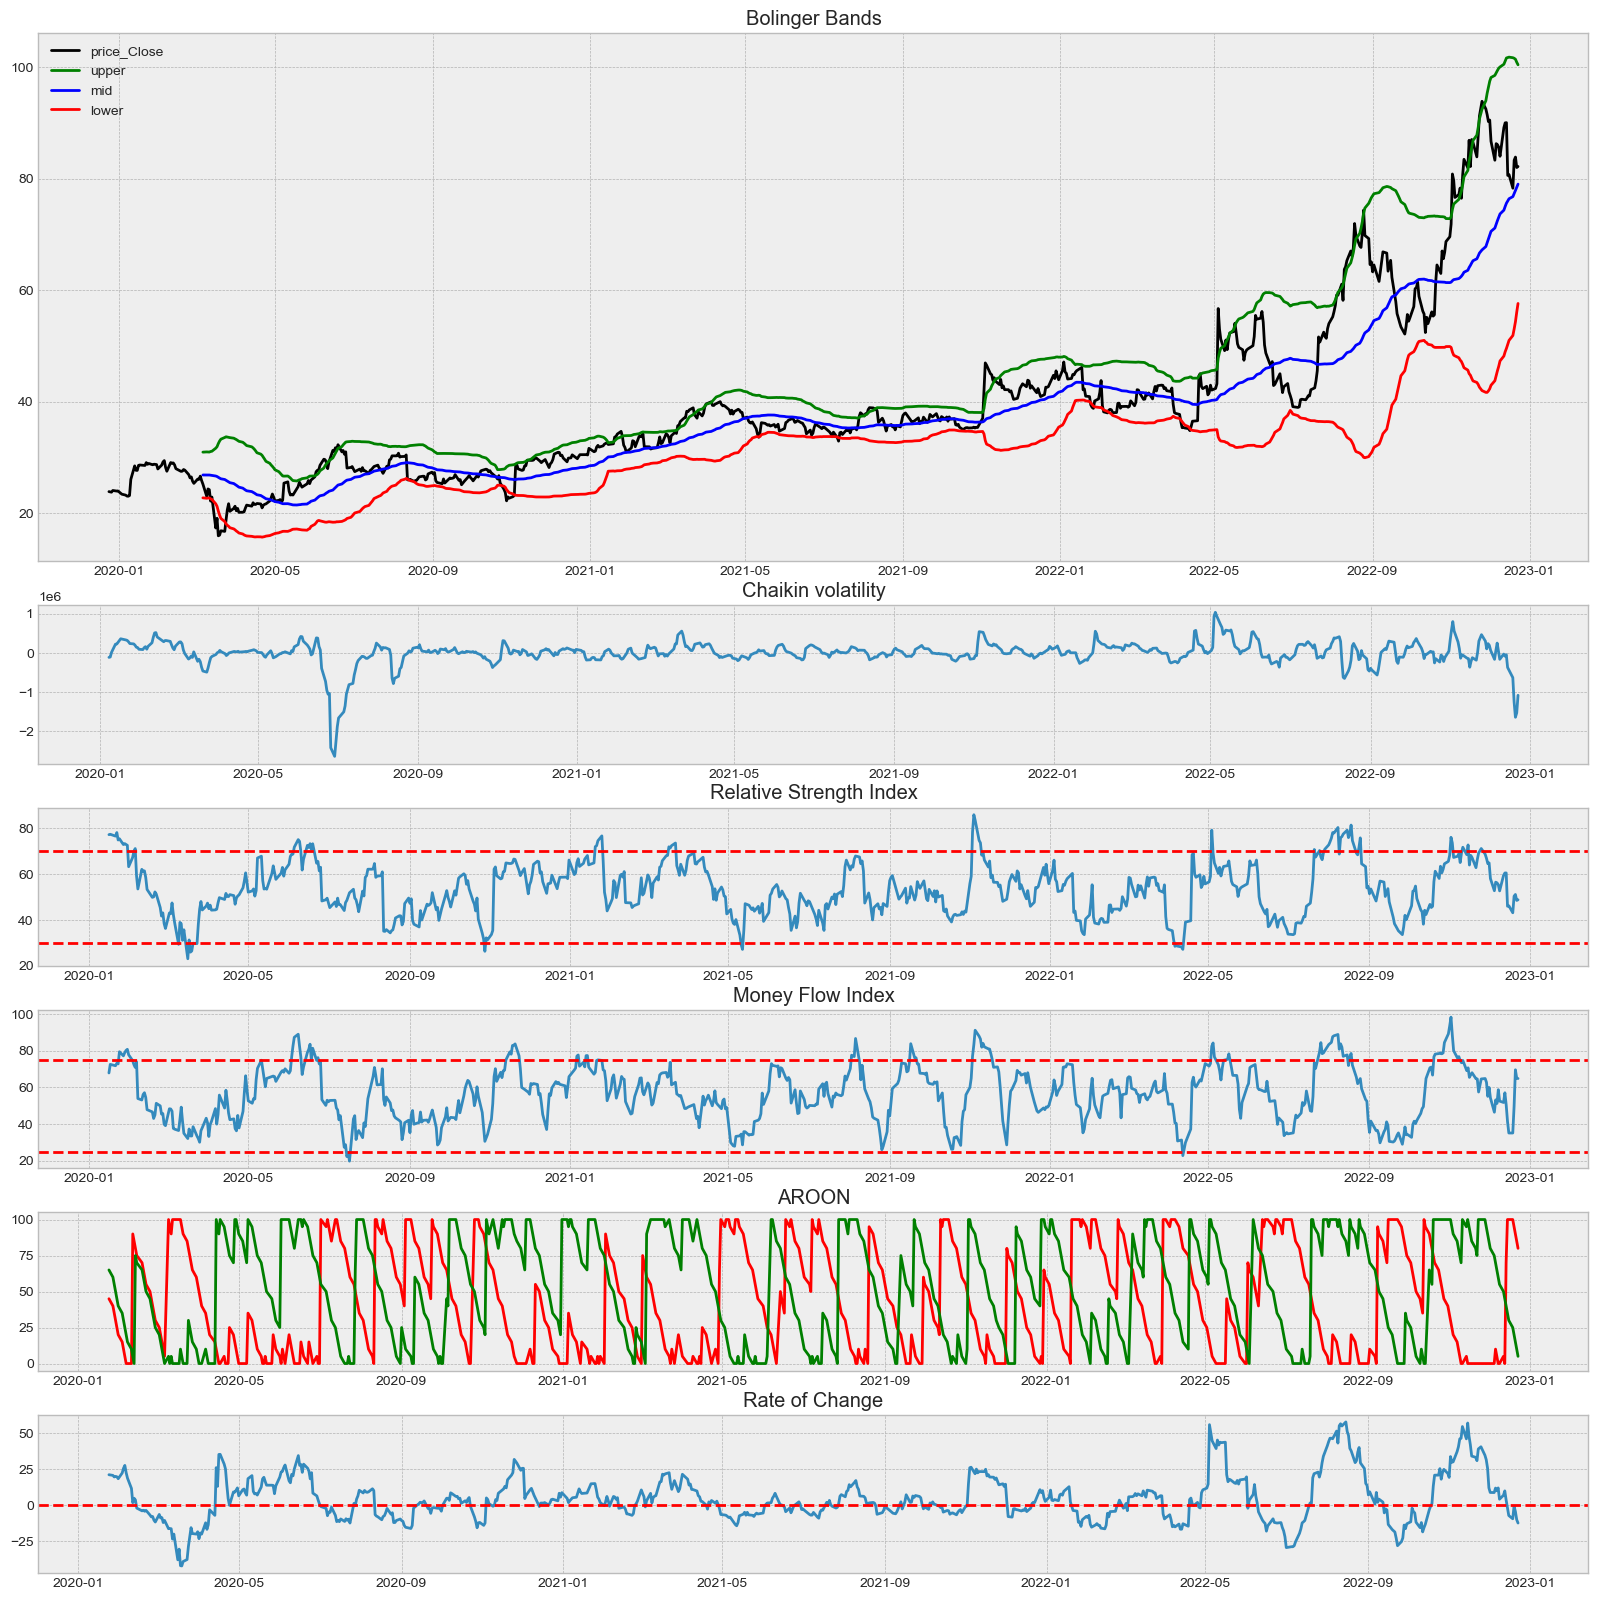

In [123]:
fig, axes = plt.subplots(6,1,figsize=(20,20),gridspec_kw={'height_ratios': [1, 0.3, 0.3, 0.3, 0.3, 0.3]})

# Bolinger Bands
axes[0].plot(Ticker_df.Close, color='black')
axes[0].plot(upper, color='green')
axes[0].plot(mid, color='blue')
axes[0].plot(lower, color='red')
axes[0].set_title('Bolinger Bands')
axes[0].legend(['price_Close', 'upper', 'mid', 'lower'])

# Chaikin
axes[1].plot(chaikin)
axes[1].set_title('Chaikin volatility')

# Relative Strength Index - RSI
axes[2].plot(rsi)
axes[2].axhline(70, linestyle = 'dashed', color = 'red')
axes[2].axhline(30, linestyle = 'dashed', color = 'red')
axes[2].set_title('Relative Strength Index')

# Money Flow Index MFI
axes[3].plot(MFI)
axes[3].axhline(75, linestyle = 'dashed', color = 'red')
axes[3].axhline(25, linestyle = 'dashed', color = 'red')
axes[3].set_title('Money Flow Index')

# Aroon Indicator
axes[4].plot(aroondown, color = 'red')
axes[4].plot(aroonup, color = 'green')
axes[4].set_title('AROON')

# Rate of Change (ROC)
axes[5].plot(ROC)
axes[5].axhline(0, linestyle = 'dashed', color = 'red')
axes[5].set_title('Rate of Change')
